In [1]:
library(ggplot2)
library(gridExtra)
library(utf8)
library(dplyr)
library(tidyr)
library(GGally)
library(RColorBrewer)
library(caret)
library(knitr)
library(scales)
library(memisc)
library(lattice)
library(MASS)


Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: 'GGally'


The following object is masked from 'package:dplyr':

    nasa


Loading required package: lattice

Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'memisc'


The following object is masked from 'package:scales':

    percent


The following objects are masked from 'package:dplyr':

    collect, recode, rename, syms


The following object is masked from 'package:ggplot2':

    syms


The following objects are masked from 'package:stats':

    contr.sum, contr.treatment, contrasts


The following object is mask

In [2]:
lc <- read.csv('LC.csv',fileEncoding = 'utf8')
str(lc)
summary(lc)

'data.frame':	328553 obs. of  21 variables:
 $ ListingId       : int  126541 133291 142421 149711 152141 162641 171191 175451 182261 193831 ...
 $ 借款金额        : int  18000 9453 27000 25000 20000 20000 3940 20000 25000 10475 ...
 $ 借款期限        : int  12 12 24 12 6 12 6 12 12 6 ...
 $ 借款利率        : num  18 20 20 18 16 14 18 18 16 18 ...
 $ 借款成功日期    : Factor w/ 756 levels "2015-01-01","2015-01-02",..: 119 70 477 84 22 79 172 439 75 100 ...
 $ 初始评级        : Factor w/ 6 levels "A","B","C","D",..: 3 4 5 3 3 1 5 2 2 3 ...
 $ 借款类型        : Factor w/ 4 levels "APP闪电","电商",..: 4 4 3 4 2 3 2 3 4 2 ...
 $ 是否首标        : Factor w/ 2 levels "否","是": 1 1 1 1 1 1 1 1 1 1 ...
 $ 年龄            : int  35 34 41 34 24 36 27 32 33 25 ...
 $ 性别            : Factor w/ 2 levels "男","女": 1 1 1 1 1 1 2 1 2 1 ...
 $ 手机认证        : Factor w/ 2 levels "成功认证","未成功认证": 1 2 1 1 1 1 1 1 1 1 ...
 $ 户口认证        : Factor w/ 2 levels "成功认证","未成功认证": 2 1 2 1 1 1 1 1 2 1 ...
 $ 视频认证        : Factor w/ 2 levels "成功认证","未成功认证":

   ListingId           借款金额         借款期限        借款利率   
 Min.   :  126541   Min.   :   100   Min.   : 1.00   Min.   : 6.5  
 1st Qu.:11908871   1st Qu.:  2033   1st Qu.: 6.00   1st Qu.:20.0  
 Median :19523251   Median :  3397   Median :12.00   Median :20.0  
 Mean   :19079479   Mean   :  4424   Mean   :10.21   Mean   :20.6  
 3rd Qu.:26298621   3rd Qu.:  5230   3rd Qu.:12.00   3rd Qu.:22.0  
 Max.   :32819531   Max.   :500000   Max.   :24.00   Max.   :24.0  
                                                                   
     借款成功日期    初始评级      借款类型      是否首标         年龄      
 2017-01-25:  3558   A: 10284   APP闪电:112079   否:241090   Min.   :17.00  
 2017-01-20:  3063   B: 33188   电商   :  1069   是: 87463   1st Qu.:24.00  
 2016-12-14:  2266   C:131705   普通   :118103               Median :28.00  
 2016-12-02:  2033   D:134860   其他   : 97302               Mean   :29.14  
 2017-01-09:  1859   E: 17027                                3rd Qu.:33.00  
 2017-01-04:  1806   F:  1489       

1. **ListingId**: 列表序号，为列表的唯一键。

2. **借款金额**: 列表成交总金额。

3. **借款期限**: 总的期数（按月计）。

4. **借款利率**: 年化利率（百分数）。

5. **借款成功日期**: 列表成交的日期。都在2015年1月1日以后。

6. **初始评级**: 列表成交时的信用评级。AAA为安全标，AA为赔标，A-F为信用等级。

7. **借款类型**: 分为'应收安全标'，‘电商’，‘APP闪电’，‘普通’和‘其他’。

8. **是否首标**: 该标是否为借款人首标。

9. **年龄**: 借款人在该列表借款成功时的年龄。

10. **性别**: 该列表借款人性别。

11. **手机认证**: 该列表借款人手机实名认证是否成功。

12. **户口认证**: 该列表借款人户口认证是否成功。

13. **视频认证**: 该列表借款人视频认证是否成功。

14. **学历认证**: 该列表借款人学历认证是否成功。成功则表示有大专及以上学历。

15. **征信认证**: 该列表借款人征信认证是否成功。成功则表示有人行征信报告。

16. **淘宝认证**: 该列表借款人淘宝认证是否成功。成功则表示为淘宝店主。

17. **历史成功借款次数**: 借款人在该列表成交之前的借款成功次数。

18. **历史成功借款金额**: 借款人在该列表成交之前的借款成功金额。

19. **总待还本金**: 借款人在该列表成交之前待还本金金额。

20. **历史正常还款期数**: 借款人在该列表成交之前的按期还款期数。

21. **历史逾期还款期数**: 借款人在该列表成交之前的逾期还款期数。

### 数据处理
  * 日期处理

In [3]:
lc <- separate(lc,借款成功日期,c('year','month','day'),sep='-',remove=F)
lc$year <- factor(lc$year)
lc$month <- factor(lc$month)
lc$day <- factor(lc$day)

In [4]:
lc$借款成功日期 <- as.Date(lc$借款成功日期,"%Y-%m-%d")
lc$借款成功年月 <- format(lc$借款成功日期,"%Y-%m")

* 认证评分(1表示认证成功,0表示未认证成功)

In [5]:
lc$认证评分 <- (lc$手机认证=='成功认证') + (lc$户口认证=='成功认证') + (lc$视频认证=='成功认证') + 
  (lc$学历认证=='成功认证') + (lc$征信认证=='成功认证') + (lc$淘宝认证=='成功认证')

* 客户评级

In [6]:
lc$初始评级 <- factor(lc$初始评级,levels=c('F','E','D','C','B','A'),ordered=T)

* 划分首标和非首标

In [7]:
#首标
lc_fb <- subset(lc,是否首标=='是')

#非首标
lc_nfb <- subset(lc,是否首标=='否')

* 划分年龄阶段

In [8]:
lc$年龄阶段 <- cut(lc$年龄,breaks = c(17,20,25,30,35,40,45,50,56),include.lowest = T)

## 探索数据集
### 单变量分析
* 贷款人年龄

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   24.00   28.00   29.14   33.00   56.00 

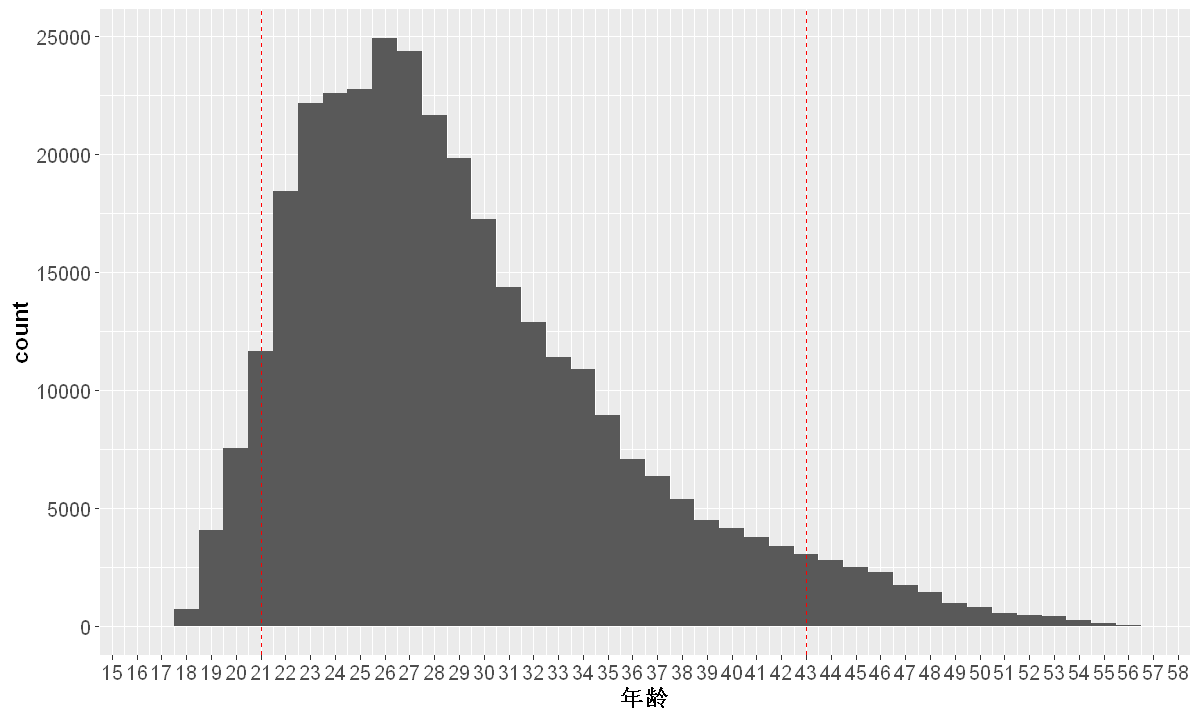

In [9]:
summary(lc$年龄)
options(repr.plot.width=10, repr.plot.height=6, repr.plot.pointsize=8)
ggplot(aes(x=年龄),data=lc)+
  geom_histogram(binwidth = 1)+
  scale_x_continuous(breaks = seq(15,60,1))+
  geom_vline(xintercept = quantile(lc$年龄,probs = 0.95,na.rm = T),linetype='dashed',color='red')+
  geom_vline(xintercept = quantile(lc$年龄,probs = 0.05,na.rm = T),linetype='dashed',color='red')+
  theme(axis.title.x=element_text(size=14,face="bold"),
        axis.title.y=element_text(size=14,face="bold"),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12))

结论:95%的借贷人的年龄在21岁到43岁之间

* 贷款人性别

男     女 
221946 106607

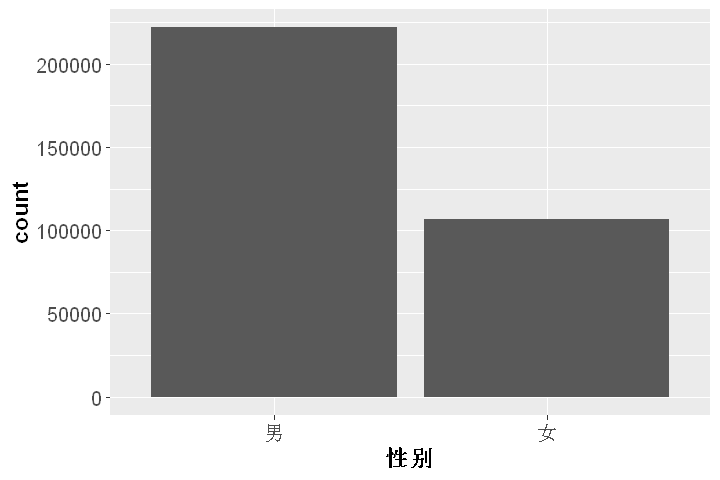

In [10]:
summary(lc$性别)
options(repr.plot.width=6, repr.plot.height=4, repr.plot.pointsize=8)
ggplot(aes(x=性别),data=lc)+
  geom_bar()+
  theme(axis.title.x=element_text(size=14,face="bold"),
        axis.title.y=element_text(size=14,face="bold"),
        axis.text.y=element_text(size=12),
        axis.text.x=element_text(size=12))

结论:借贷人为男性的数量大约是女性的2倍
* 借款成功日期

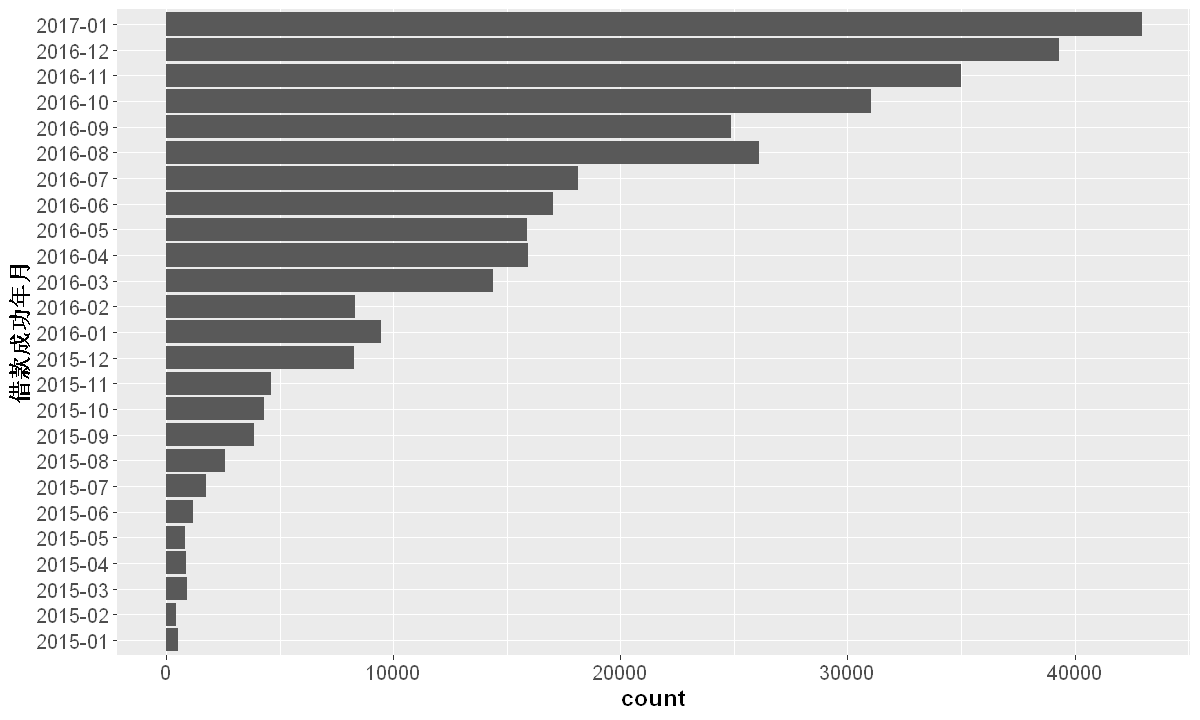

In [11]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(aes(x=借款成功年月),data=lc)+geom_bar()+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))+
  coord_flip()

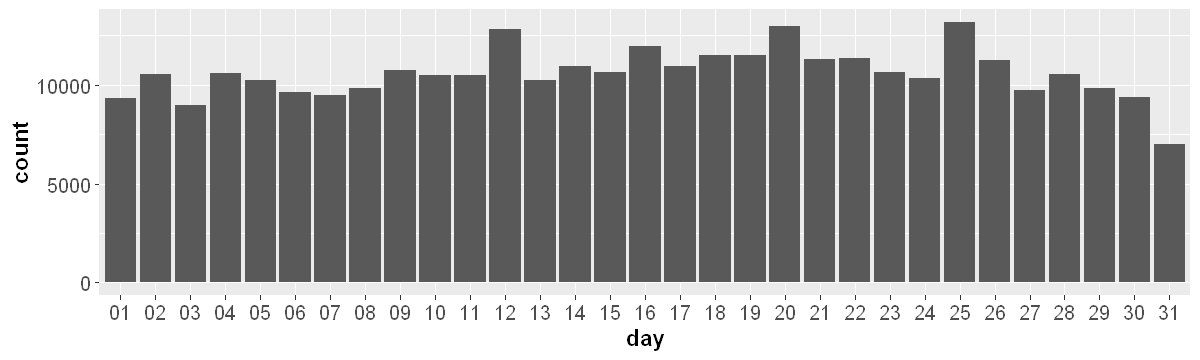

In [12]:
options(repr.plot.width=10, repr.plot.height=3)
lc_day <- ggplot(aes(x=day),data=lc)+geom_bar()+
          theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))
lc_day

#lc_year <- ggplot(aes(x=year),data=lc)+geom_bar()
#lc_month <- ggplot(aes(x=month),data=lc)+geom_bar()
#grid.arrange(lc_year,lc_month,lc_day)

* 验证方式

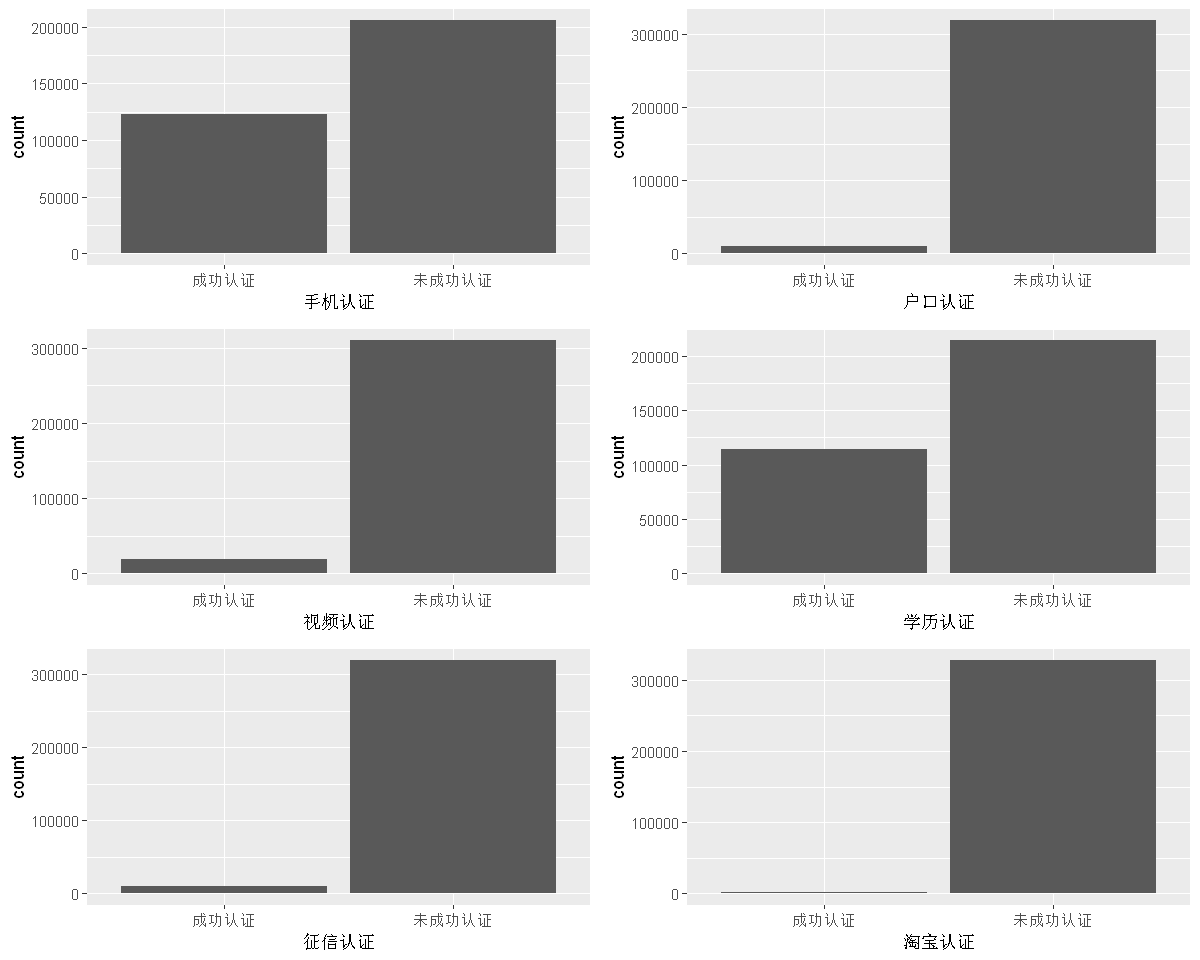

In [13]:
options(repr.plot.width=10, repr.plot.height=8,scipen=200)
lc_phone_cret <- ggplot(aes(x=手机认证),data=lc)+geom_bar()
lc_id_cret <- ggplot(aes(x=户口认证),data=lc)+geom_bar()
lc_video_cret <- ggplot(aes(x=视频认证),data=lc)+geom_bar()
lc_dipoma_cret <- ggplot(aes(x=学历认证),data=lc)+geom_bar()
lc_card_cret <- ggplot(aes(x=征信认证),data=lc)+geom_bar()
lc_shop_cret <- ggplot(aes(x=淘宝认证),data=lc)+geom_bar()
grid.arrange(lc_phone_cret,lc_id_cret,lc_video_cret,lc_dipoma_cret,lc_card_cret,lc_shop_cret)

* 认证评分

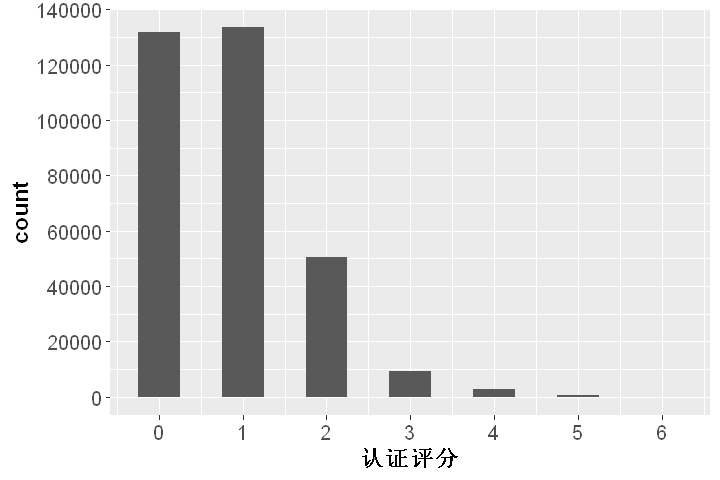

In [14]:
options(repr.plot.width=6, repr.plot.height=4,scipen=200)
ggplot(aes(x=认证评分),data=lc)+
  geom_histogram(binwidth = 0.5)+
  scale_x_continuous(breaks = seq(0,6,1))+
  scale_y_continuous(breaks = seq(0,150000,20000))+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))
#+scale_y_log10()

结论:6分全部成功认证成功的客户很少,一般的认证评分为1~2分
* 借款金额

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    100    2033    3397    4424    5230  500000 

5% 
660

95% 
9000

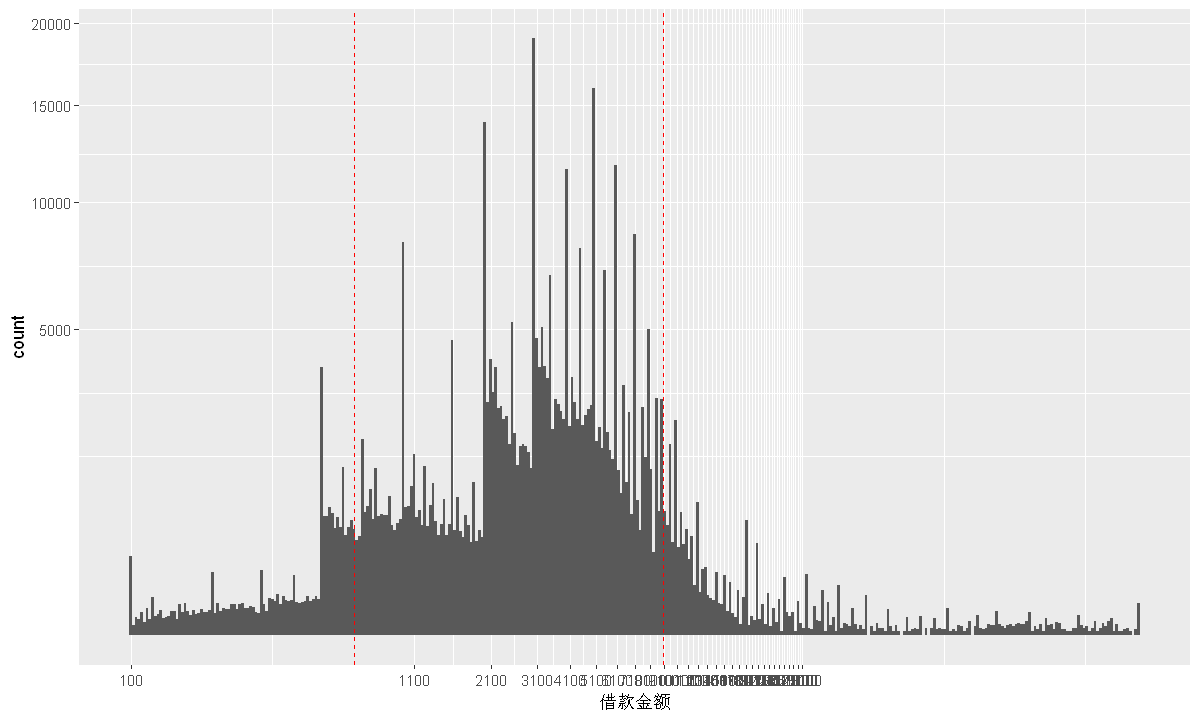

In [15]:
summary(lc$借款金额)
quantile(lc$借款金额,probs = 0.05,na.rm = T)
quantile(lc$借款金额,probs = 0.95,na.rm = T)
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
ggplot(aes(x=借款金额),data=lc)+
  geom_histogram(binwidth = 0.01)+
  scale_x_log10(breaks = seq(100,30000,1000))+
  scale_y_sqrt()+
  geom_vline(xintercept = quantile(lc$借款金额,probs = 0.95,na.rm = T),linetype='dashed',color='red')+
  geom_vline(xintercept = quantile(lc$借款金额,probs = 0.05,na.rm = T),linetype='dashed',color='red')

* 借款利率

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.5    20.0    20.0    20.6    22.0    24.0 

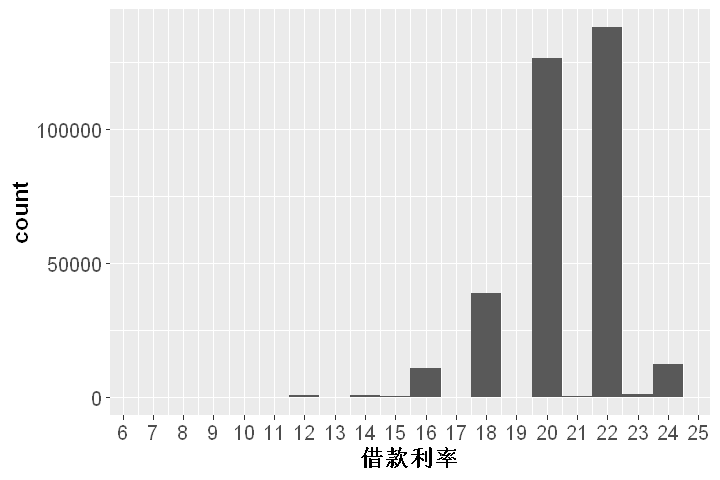

In [17]:
options(repr.plot.width=6, repr.plot.height=4,scipen=200)
summary(lc$借款利率)
ggplot(aes(x=借款利率),data=lc)+
  geom_histogram(binwidth = 1)+
  scale_x_continuous(breaks = seq(4,26,1))+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

* 借款期限

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    6.00   12.00   10.21   12.00   24.00 

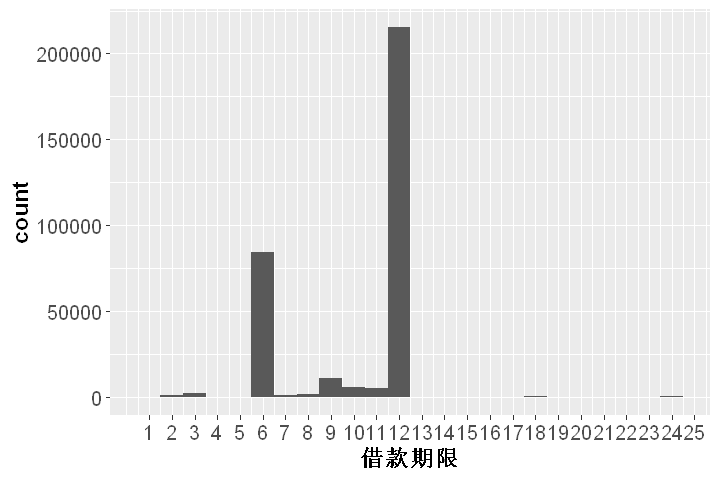

In [18]:
options(repr.plot.width=6, repr.plot.height=4,scipen=200)
summary(lc$借款期限)
ggplot(aes(x=借款期限),data=lc)+
  geom_histogram(binwidth = 1)+
  scale_x_continuous(breaks = seq(1,25,1))+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

结论:借款期限以短期借款为主,多为6个月或者12个月期限
* 历史成功借款次数

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   2.000   2.323   3.000 649.000 

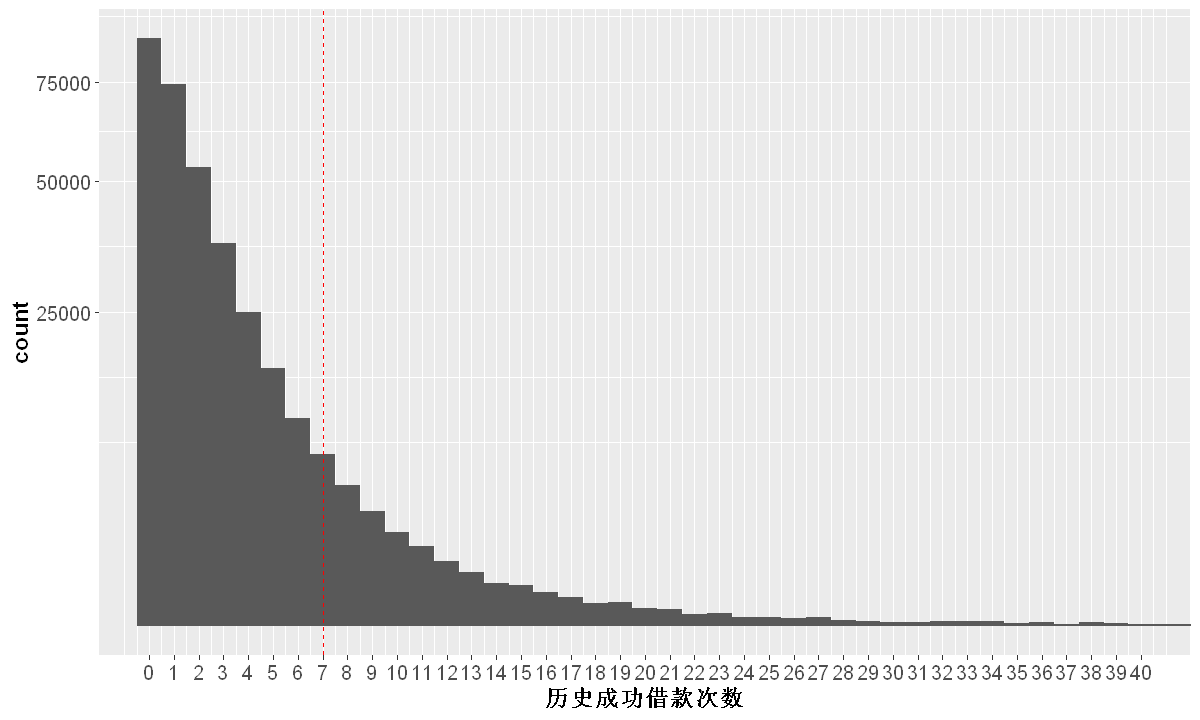

In [21]:
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
summary(lc$历史成功借款次数)
ggplot(aes(x=历史成功借款次数),data=lc)+
  geom_histogram(binwidth = 1)+
  coord_cartesian(xlim = c(0,40))+
  scale_x_continuous(breaks = seq(0,40,1))+
  scale_y_sqrt()+
  geom_vline(xintercept = quantile(lc$历史成功借款次数,probs = 0.95,na.rm = T),linetype='dashed',color='red')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

结论:95%的借贷人借款的次数少于7次
* 历史逾期还款期数

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4233  0.0000 60.0000 

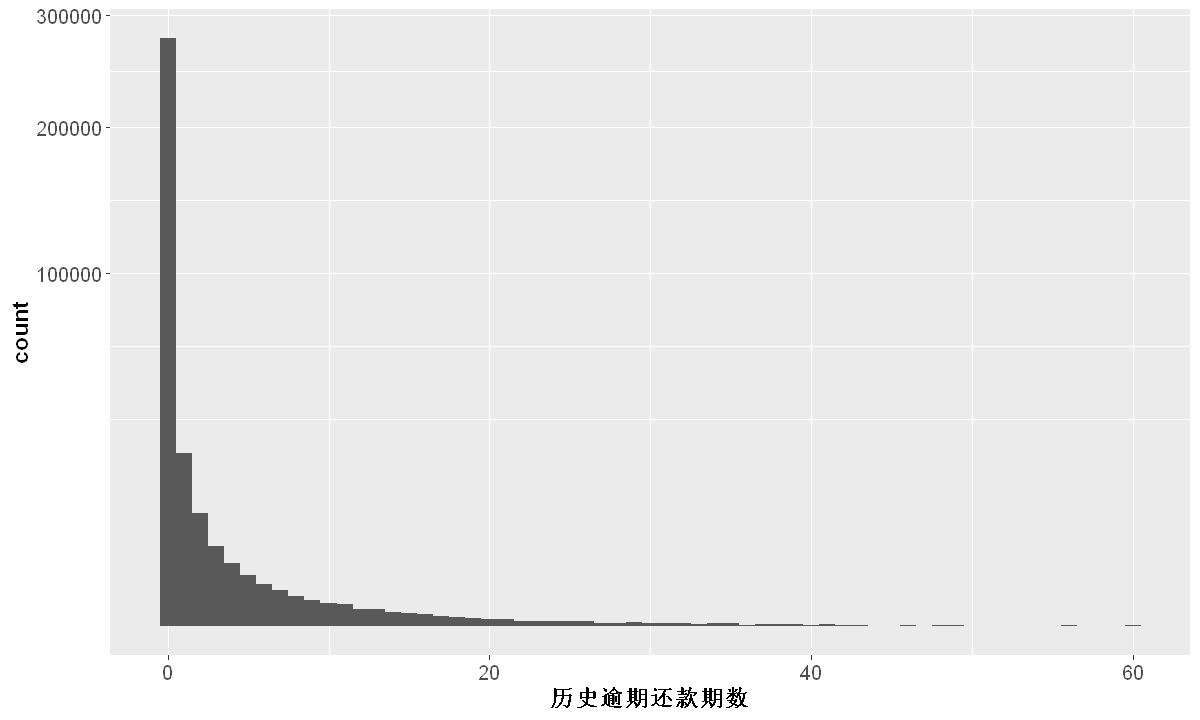

In [23]:
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
summary(lc$历史逾期还款期数)
ggplot(aes(x=历史逾期还款期数),data=lc)+
  geom_histogram(binwidth = 1)+
  scale_y_sqrt()+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

结论:大部分借贷人未逾期
* 历史成功借款金额

In [24]:
quantile(subset(lc$历史成功借款金额,lc$历史成功借款次数>0),probs=c(.5,.75,.9,.95,1))

50%     75%     90%     95%    100% 
   7473   13082   22765   32332 7405926

结论:95%的非首次借款人的历史成功借款金额不高于32332，75%不高于13082，50%不高于7473。结合历史成功借款次数，一些借款数较高的应该属于多次借款的总和
* 初始评级

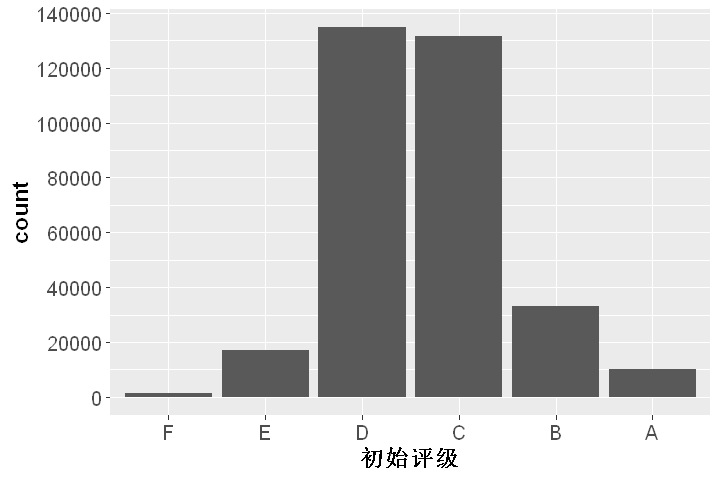

In [30]:
options(repr.plot.width=6, repr.plot.height=4,scipen=200)
ggplot(aes(x=初始评级),data=lc)+
  geom_bar()+
  scale_y_continuous(breaks = seq(0,140000,20000))+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

结论:大部分用户的初始评级是D,C级别

## 双变量分析
* 借贷利率和初始评级的关系

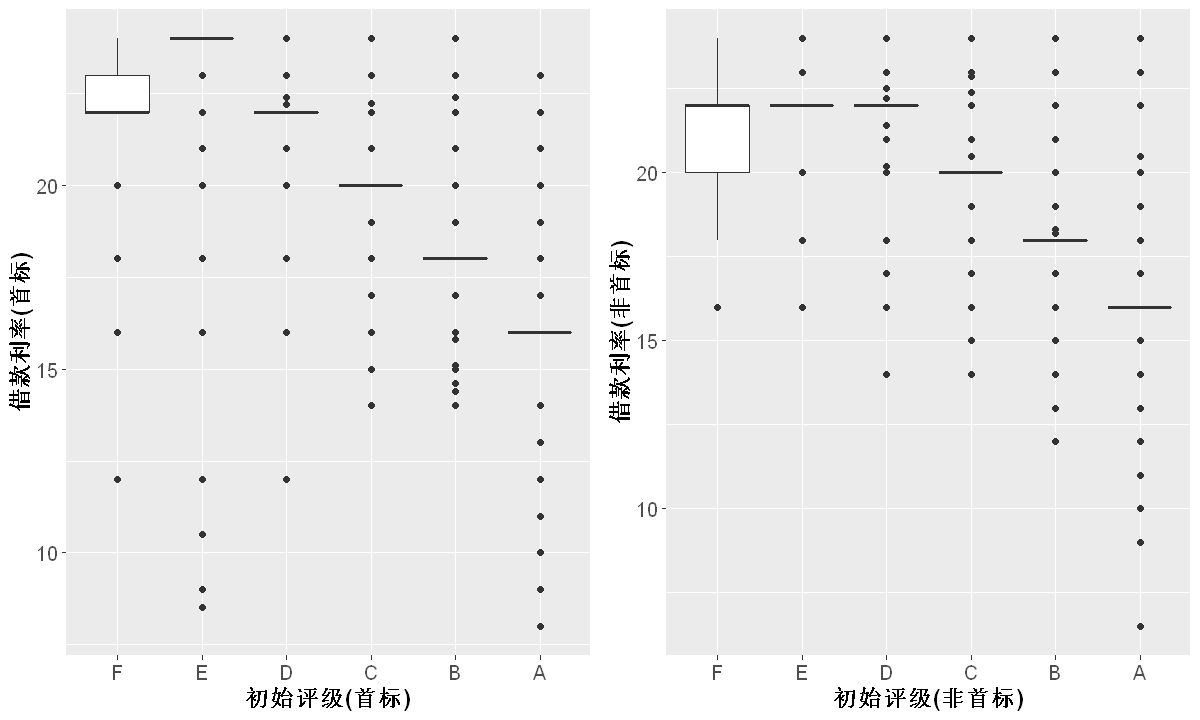

In [35]:
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
box_fb <- ggplot(aes(x=初始评级,y=借款利率),data=lc_fb)+
  geom_boxplot()+
  labs(x='初始评级(首标)',y='借款利率(首标)')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

box_nfb <- ggplot(aes(x=初始评级,y=借款利率),data=lc_nfb)+
  geom_boxplot()+
  labs(x='初始评级(非首标)',y='借款利率(非首标)')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

grid.arrange(box_fb,box_nfb,ncol=2)

结论:初始评级越高,贷款利率越低
* 借款类型和利率的关系

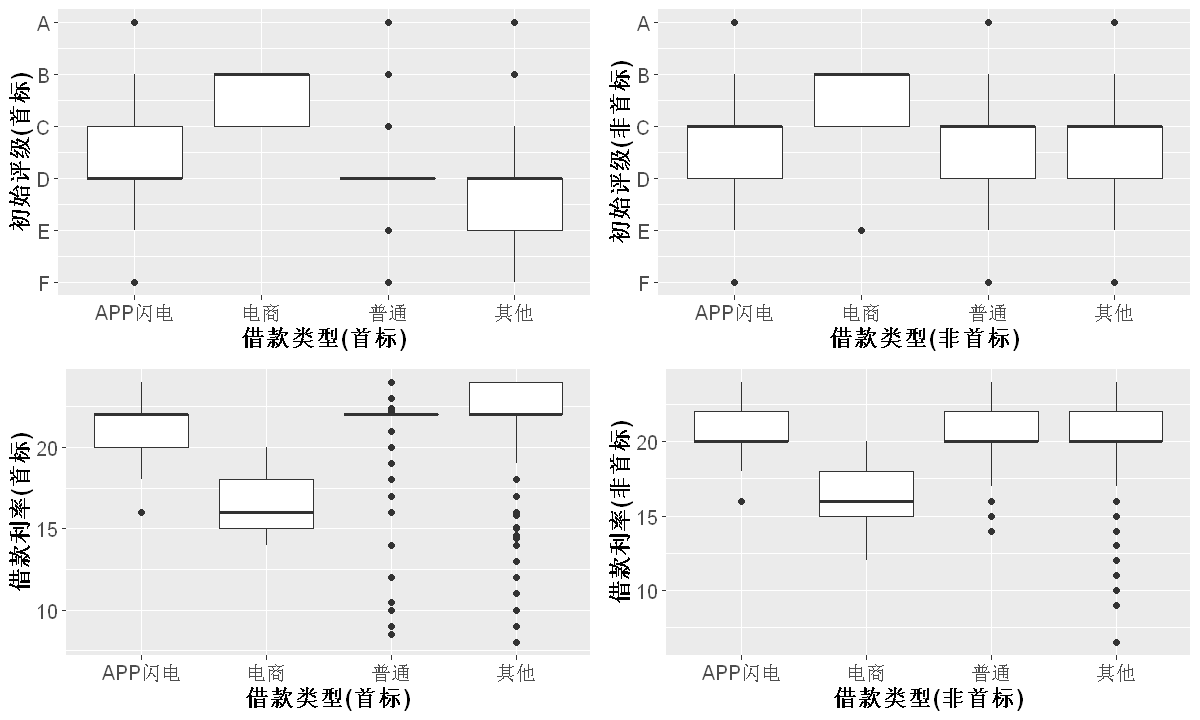

In [57]:
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
box_fb1 <- ggplot(aes(x=借款类型,y=as.numeric(初始评级)),data=lc_fb)+
  geom_boxplot()+
  scale_y_continuous(breaks = seq(1,6,1),labels = c('F','E','D','C','B','A'))+
  labs(x='借款类型(首标)',y='初始评级(首标)')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

box_fb2 <- ggplot(aes(x=借款类型,y=借款利率),data=lc_fb)+
  geom_boxplot()+
  labs(x='借款类型(首标)',y='借款利率(首标)')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

box_nfb1 <- ggplot(aes(x=借款类型,y=as.numeric(初始评级)),data=lc_nfb)+
  geom_boxplot()+
  scale_y_continuous(breaks = seq(1,6,1),labels = c('F','E','D','C','B','A'))+
  labs(x='借款类型(非首标)',y='初始评级(非首标)')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

box_nfb2 <- ggplot(aes(x=借款类型,y=借款利率),data=lc_nfb)+
  geom_boxplot()+
  labs(x='借款类型(非首标)',y='借款利率(非首标)')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

grid.arrange(box_fb1,box_nfb1,box_fb2,box_nfb2,ncol=2)

　结论:电商用户的初始评级是C,B,所以获得了更低的利率,APP闪电,普通,其他类型的用户的初始评级是D,所以利率比电商高
* 初始评级和认证评分的关系

Warning message in pal_name(palette, type):
"Unknown palette green"


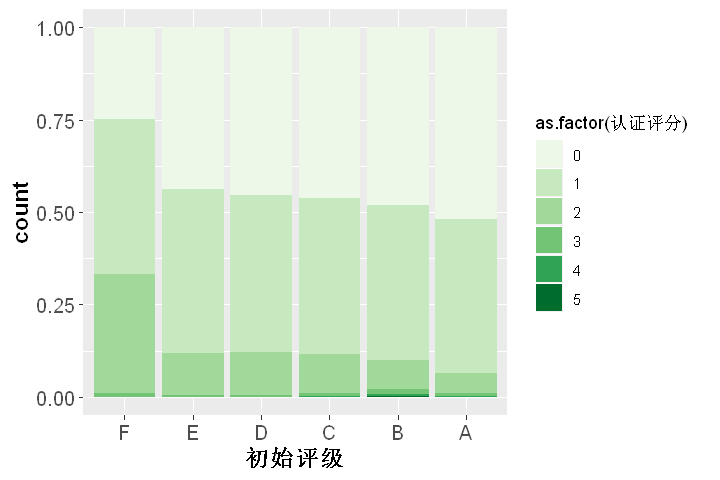

In [46]:
options(repr.plot.width=6, repr.plot.height=4,scipen=200)
ggplot(aes(x=初始评级),data=lc_fb)+
  geom_bar(aes(fill=as.factor(认证评分)),position = 'fill')+
  scale_fill_brewer(palette = 'green')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

结论:在首标部分,并没有说明认证评分越高,利率越低的趋势
* 历史成功借款金额和借款金额的关系(非首标)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



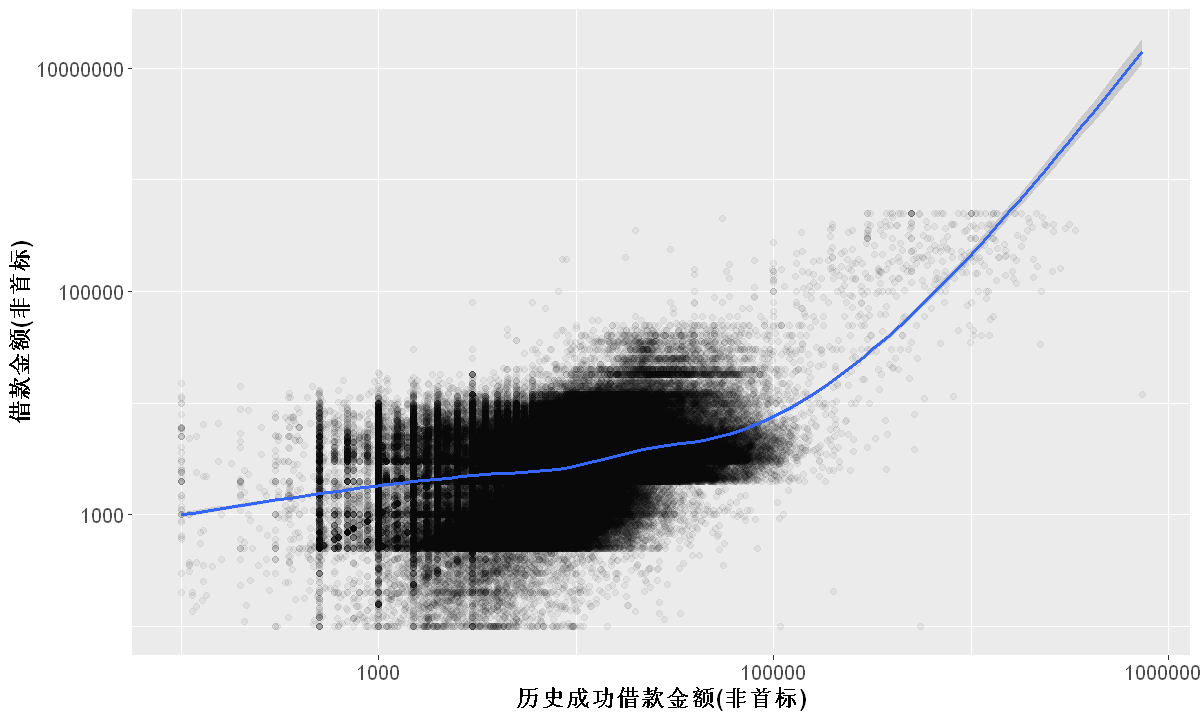

In [60]:
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
ggplot(aes(x=历史成功借款金额,y=借款金额),data=lc_nfb)+
  geom_point(alpha=1/20,position = 'jitter')+
  scale_x_log10()+
  scale_y_log10()+
  geom_smooth()+
  labs(x='历史成功借款金额(非首标)',y='借款金额(非首标)')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

* 总应还本金历史成功借款金额(非首标)

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



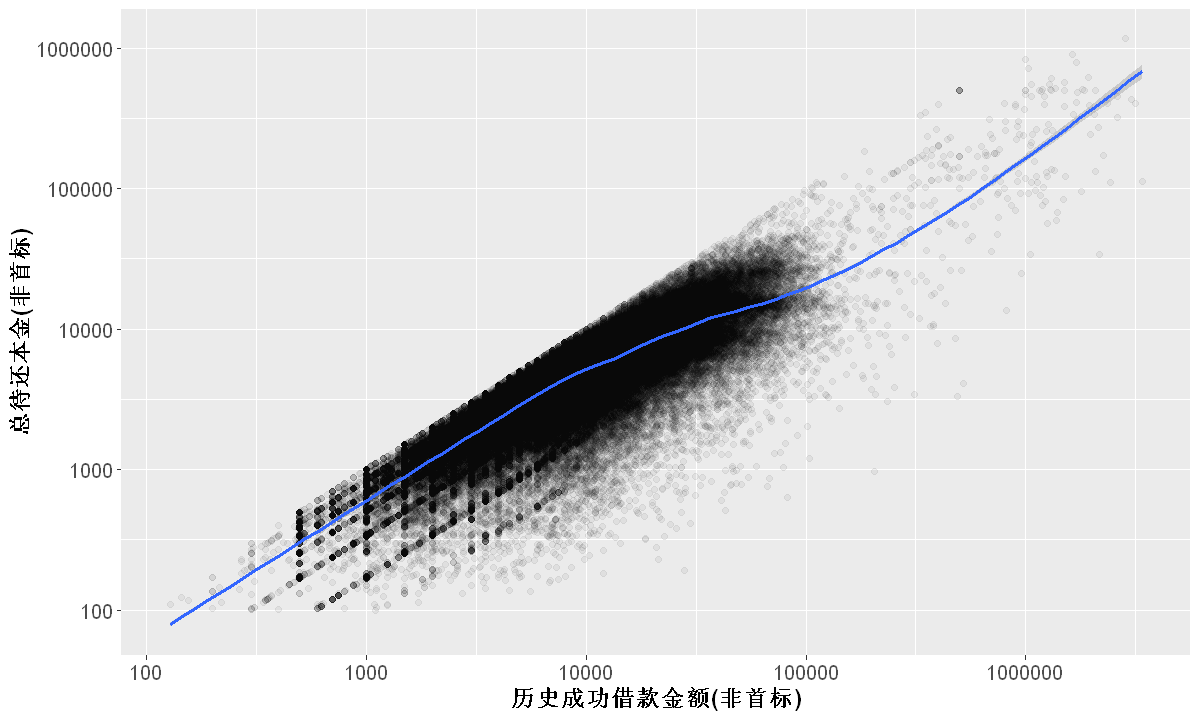

In [62]:
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
ggplot(aes(x=历史成功借款金额,y=总待还本金),data=subset(lc_nfb,总待还本金>100))+
  geom_point(alpha=1/20,position = 'jitter')+
  scale_x_log10()+
  scale_y_log10()+
  geom_smooth()+
  labs(x='历史成功借款金额(非首标)',y='总待还本金(非首标)')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

* 年龄阶段和借款金额的关系

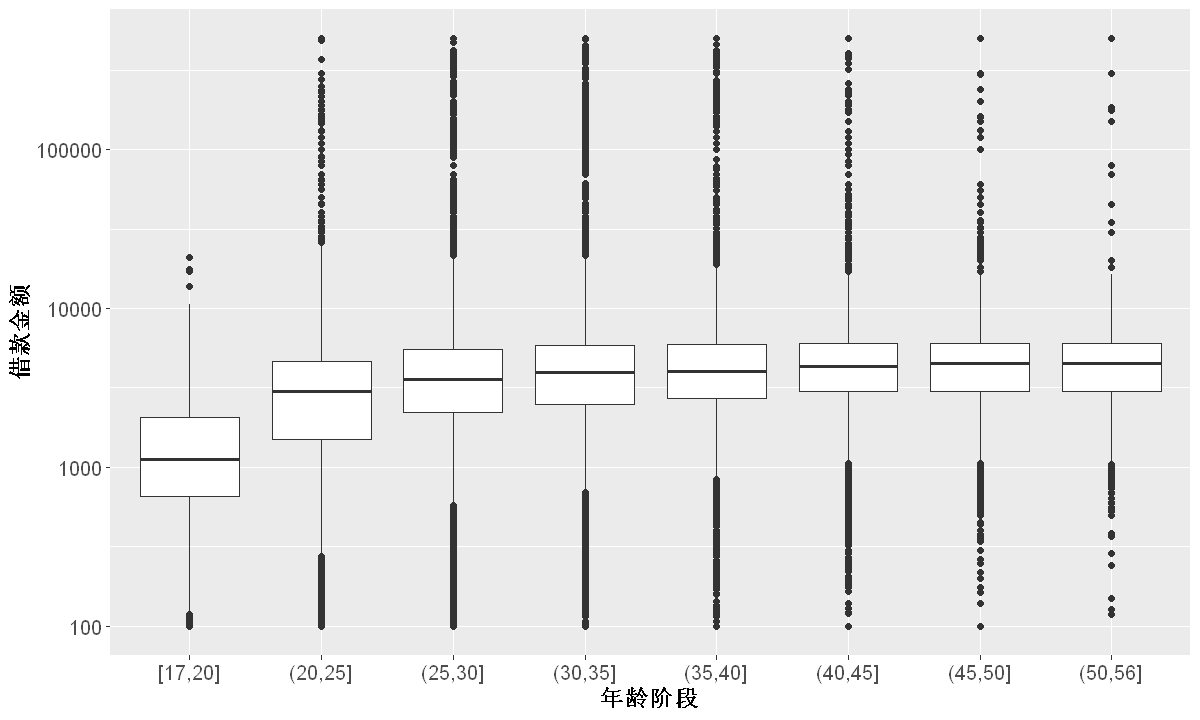

In [63]:
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
ggplot(aes(x=年龄阶段,y=借款金额),data=lc)+
  geom_boxplot()+
  scale_y_log10()+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

结论:17-20岁的青年借款数量较少,25-30岁的成年人借款金额增大,30-45岁之间的高额借款的比例增多,55-60之间的借款金额保持不变
* 年龄阶段和初始评级的关系

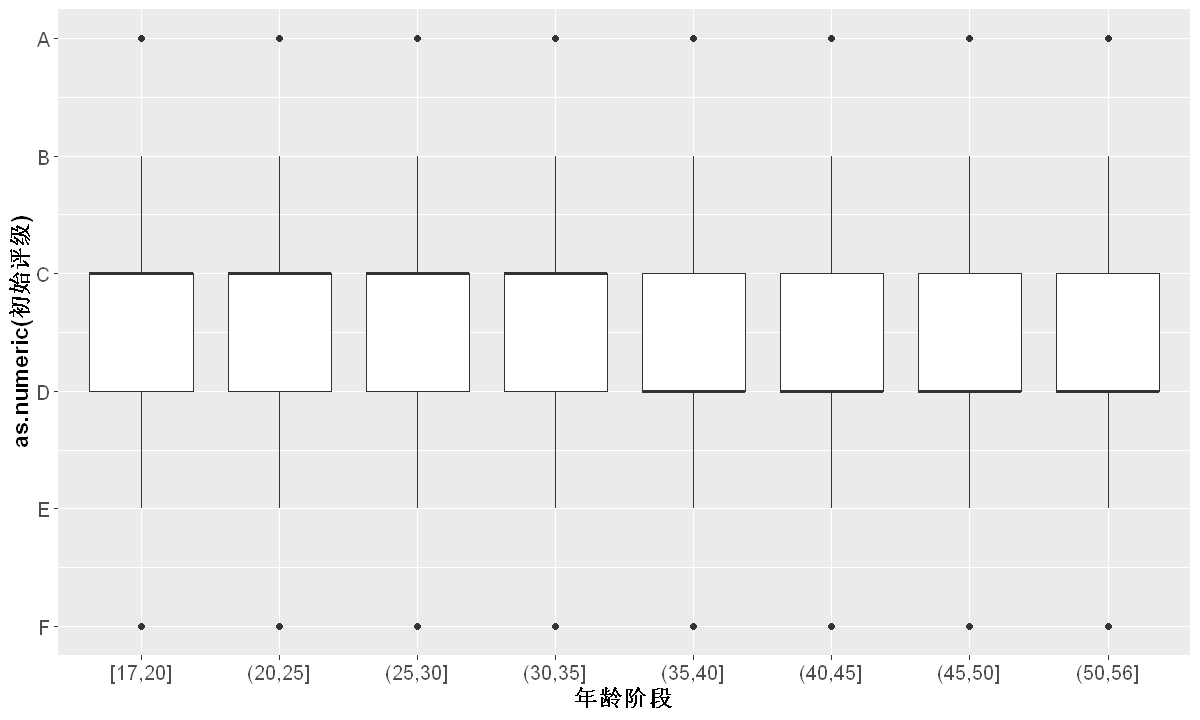

In [64]:
options(repr.plot.width=10, repr.plot.height=6,scipen=200)
ggplot(aes(x=年龄阶段,y=as.numeric(初始评级)),data=lc)+
  geom_boxplot()+
  scale_y_continuous(breaks = seq(1,6,1),labels = c('F','E','D','C','B','A'))+
  labs('初始评级')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

* 贷款利率和借款总金额的关系

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



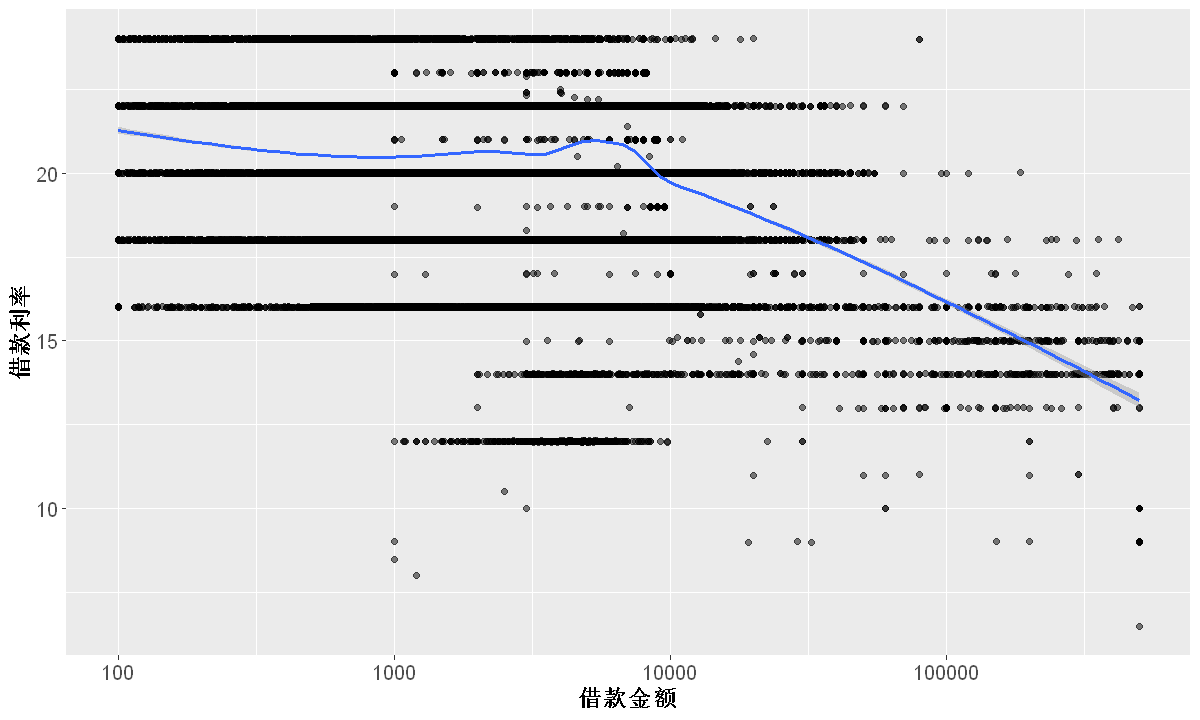

In [65]:
ggplot(aes(x=借款金额,y=借款利率),data=lc)+
  geom_point(alpha=1/2,position = 'jitter')+
  scale_x_log10()+
  geom_smooth()+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

　结论:随着借款金额的增多,利率呈下降趋势

## 多变量分析
* 借款金额,利率,借款类型的关系

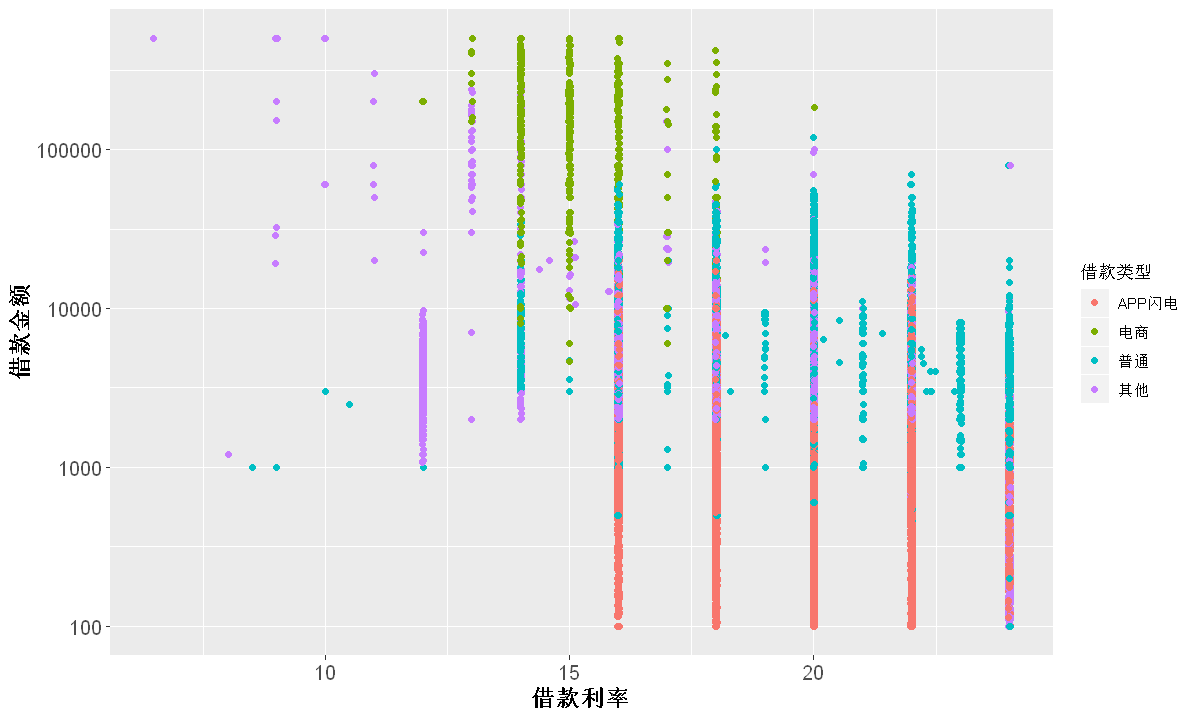

In [71]:

ggplot(aes(x=借款利率,y=借款金额,color=借款类型),data=lc)+
  geom_point(position = 'jitter')+
  scale_y_log10()+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

结论:app闪电的借款利率较高,但是涉及的金额较少,电商类型的借款利率较低,但是金额较大.普通类型的借款数额相对app闪电较多但利率高,其他类型的借款数额较大利率也比较低
* 信用评分,利率和借款总金额的关系

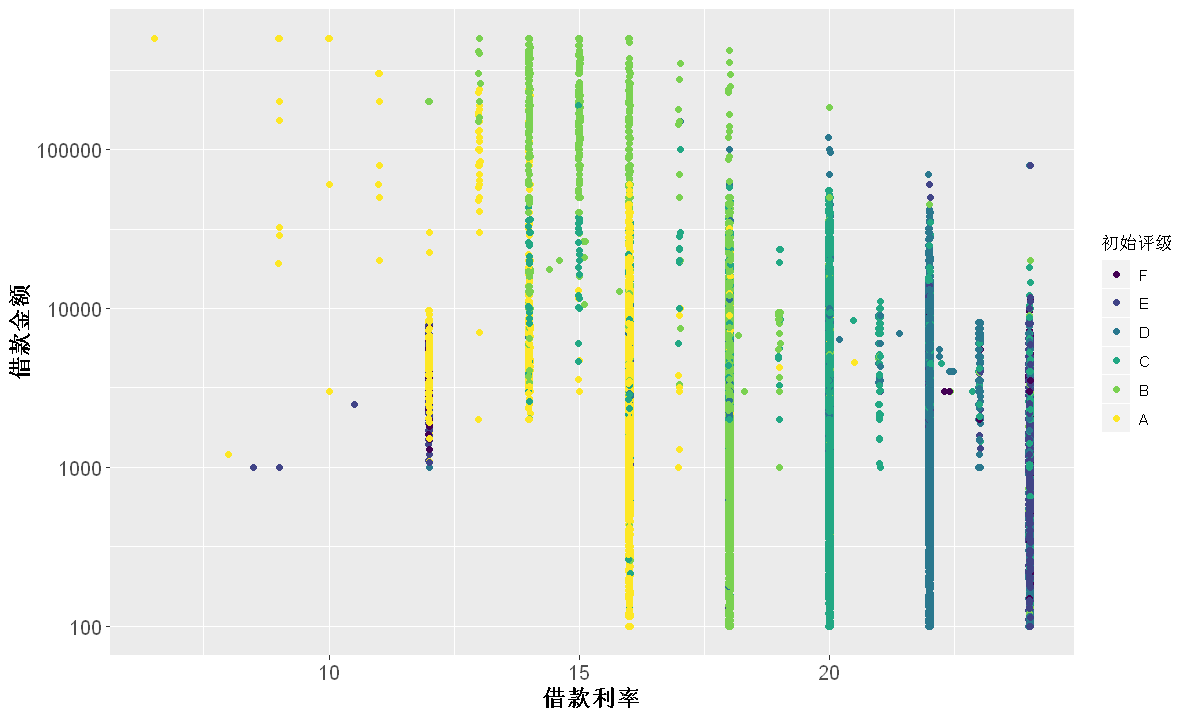

In [72]:
ggplot(aes(x=借款利率,y=借款金额,color=初始评级),data=lc)+
  geom_point(position = 'jitter')+
  scale_y_log10()+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))


结论:初始评级越高,借款利率越低,同时评级高的客户借款额度也比较高
* 认证评分,利率,借款金额的关系

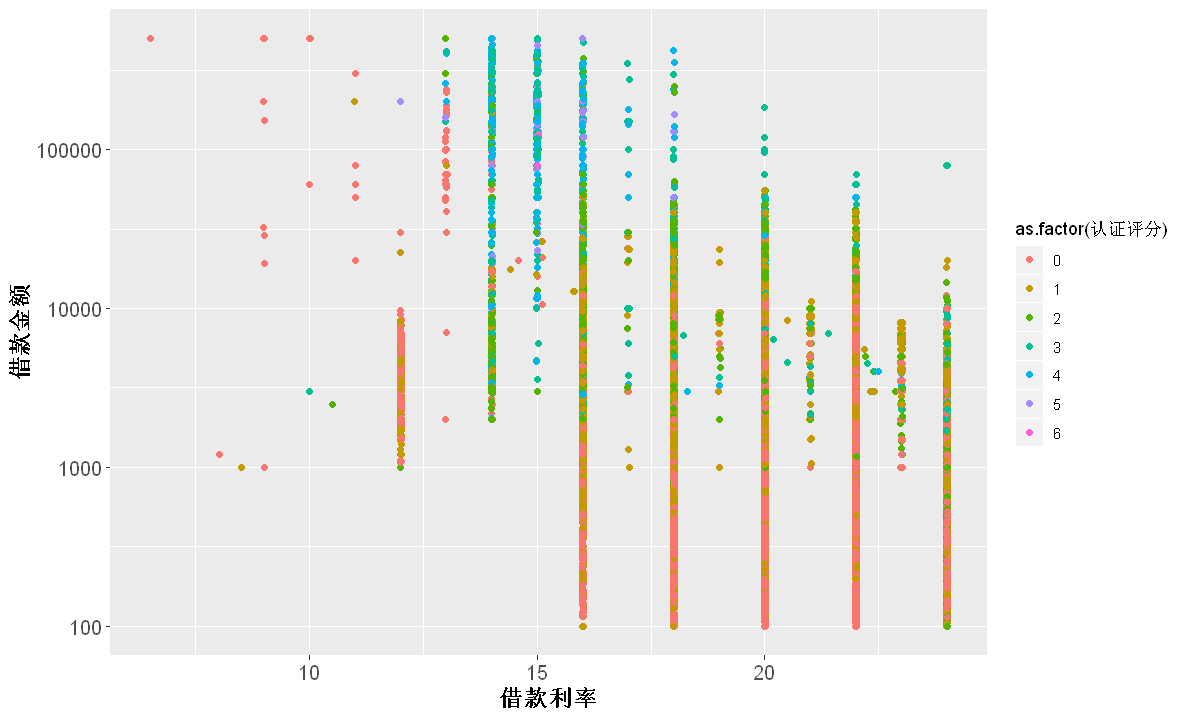

In [77]:
ggplot(aes(x=借款利率,y=借款金额,color=as.factor(认证评分)),data=lc)+
  geom_point(position = 'jitter')+
  scale_y_log10()+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

结论:证评分高的客户借款的金额较大,但是借款利率和认证评分之间没有太大的关联
* 借款期限,利率,借款金额的关系

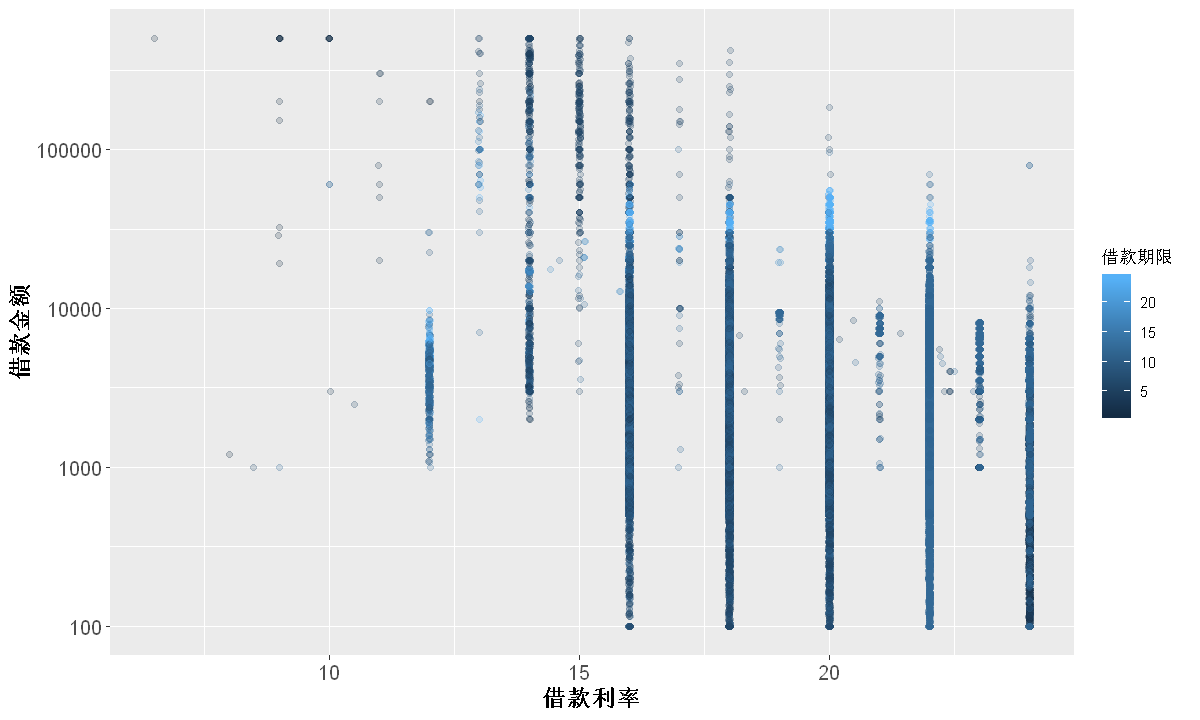

In [79]:
ggplot(aes(x=借款利率,y=借款金额,color=借款期限),data=lc)+
  geom_point(position = 'jitter',alpha=1/5)+
  scale_y_log10()+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

* 借款利率,借款期限,借款金额的关系

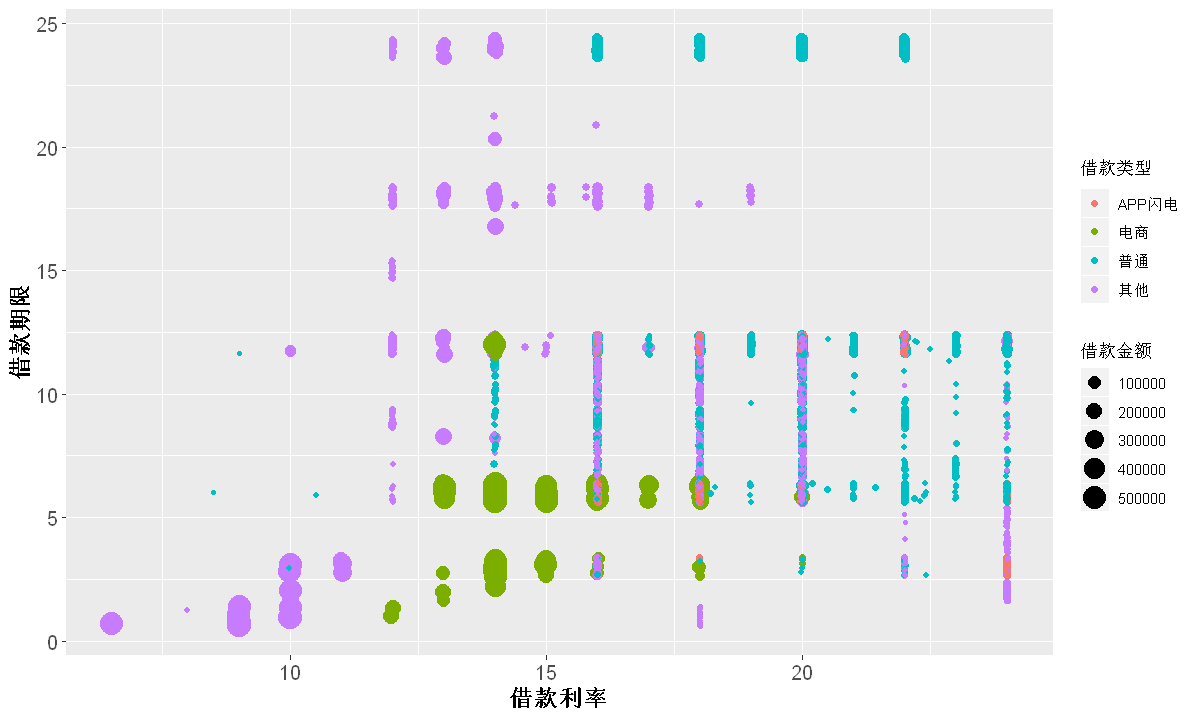

In [80]:
ggplot(aes(x=借款利率,y=借款期限,size=借款金额,color=借款类型),data=lc)+
  geom_point(position = 'jitter')+
  theme(axis.title.x=element_text(size=14,face="bold"),
                axis.title.y=element_text(size=14,face="bold"),
                axis.text.y=element_text(size=12),
                axis.text.x=element_text(size=12))

* 拟合因子,验证相关性

In [81]:
m1 <- lm(I(借款利率)~I(初始评级),
         data=subset(lc,lc$借款金额>0))

m2 <- update(m1,~ . + 认证评分)
m3 <- update(m2,~ . + 借款金额)
m4 <- update(m3,~ . + 借款类型)
mtable(m1,m2,m3,m4)

Warning message in checkLaTeXcape(leaders, "row leaders"):
"Unescaped TeX special in row leaders"


Calls:
m1: lm(formula = I(借款利率) ~ I(初始评级), data = subset(lc, lc$借款金额 > 
    0))
m2: lm(formula = I(借款利率) ~ I(初始评级) + 认证评分, data = subset(lc, 
    lc$借款金额 > 0))
m3: lm(formula = I(借款利率) ~ I(初始评级) + 认证评分 + 借款金额, 
    data = subset(lc, lc$借款金额 > 0))
m4: lm(formula = I(借款利率) ~ I(初始评级) + 认证评分 + 借款金额 + 
    借款类型, data = subset(lc, lc$借款金额 > 0))

======================================================================================
                               m1             m2             m3             m4        
--------------------------------------------------------------------------------------
  (Intercept)                 20.025***      20.105***      20.142***      20.121***  
                              (0.004)        (0.004)        (0.004)        (0.005)    
  I(初始评级): .L             -5.128***      -5.112***      -5.078***      -5.076***  
                              (0.014)        (0.014)        (0.014)        (0.014)    
  I(初始评级): .Q             -2.324***      -2.310***      -2.312***      -2.324***  
                              (0.013)        (0.013)        (0.013)        (0.013)    
  I(初始评级): .C              1.128***       1.119***       1.109***       1.094***  
                              (0.010)        (0.010)        (0.010)        (0.010)    
  I(初始评级): ^4             -0.258***      -0.255***      -0.276***      -0.280***  
                              (0.006)        (0.006)        (0.006)        (0.006)    
  I(初始评级): ^5              0.003          0.017***       0.002          0.006     
                              (0.004)        (0.004)        (0.004)        (0.004)    
  认证评分                                   -0.090***      -0.067***      -0.054***  
                                             (0.002)        (0.002)        (0.002)    
  借款金额                                                  -0.000***      -0.000***  
                                                            (0.000)        (0.000)    
  借款类型: 电商/APP闪电                                                   -1.872***  
                                                                           (0.031)    
  借款类型: 普通/APP闪电                                                    0.030***  
                                                                           (0.004)    
  借款类型: 其他/APP闪电                                                   -0.069***  
                                                                           (0.004)    
--------------------------------------------------------------------------------------
  R-squared                    0.771          0.773          0.779          0.782     
  N                       328553         328553         328553         328553         
======================================================================================
  Significance: *** = p < 0.001; ** = p < 0.01; * = p < 0.05